In [6]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
tienda = pd.read_csv('../../data/raw/Merch_RAW.csv')

In [13]:
df = tienda.copy()

In [14]:
plt.style.use('ggplot')

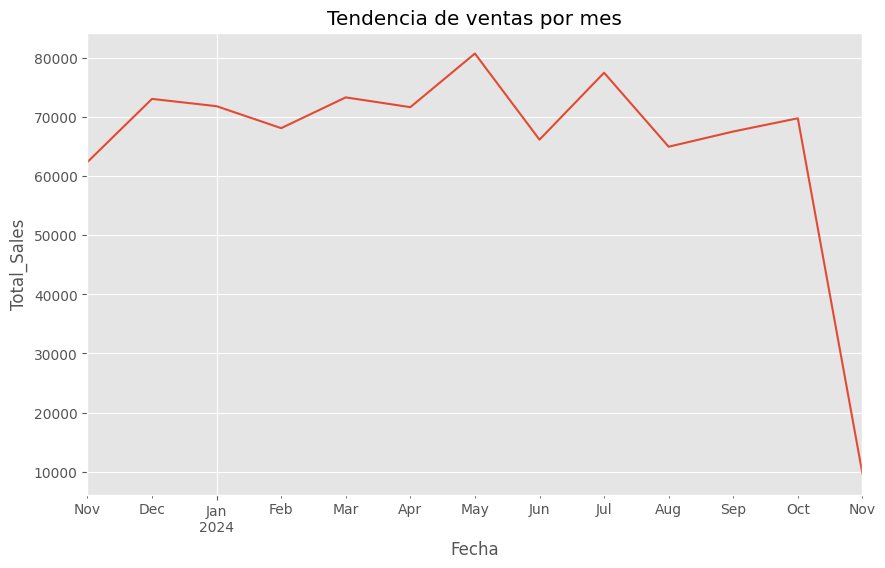

In [15]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
plt.figure(figsize=(10, 6))
df.set_index('Order_Date').resample('ME')['Total_Sales'].sum().plot()
plt.title('Tendencia de ventas por mes')
plt.xlabel('Fecha')
plt.ylabel('Total_Sales')
plt.show();

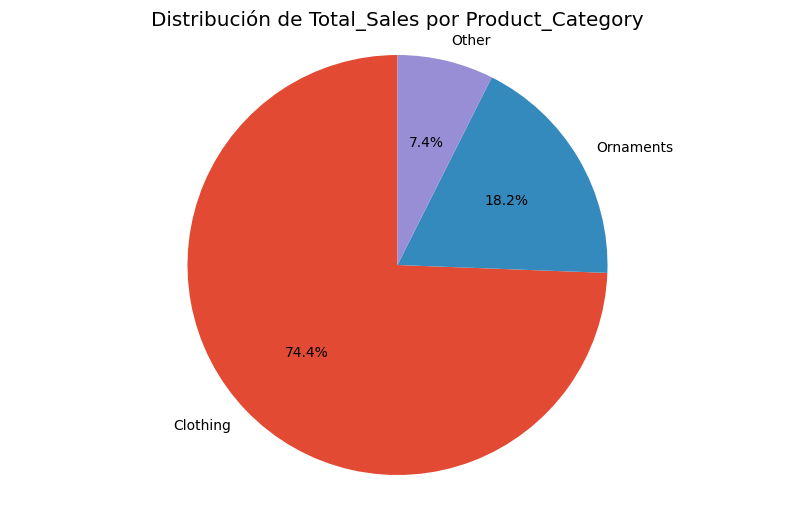

In [16]:
# Crear una gráfica de torta
total_sales_by_category = df.groupby('Product_Category')['Total_Sales'].sum()

plt.figure(figsize=(10, 6))
plt.pie(
    total_sales_by_category, 
    labels=total_sales_by_category.index, 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title('Distribución de Total_Sales por Product_Category')
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()


In [17]:
nov = df[(df['Order_Date'].dt.month == 11) & (df['Order_Date'].dt.year == 2024)]
nov['Order_Date'].unique()

<DatetimeArray>
['2024-11-03 00:00:00', '2024-11-01 00:00:00', '2024-11-02 00:00:00',
 '2024-11-04 00:00:00']
Length: 4, dtype: datetime64[ns]

De Noviembre 2024 solo tenemos los 4 primeros dias, por eso la bajada llamativa en ese mes.

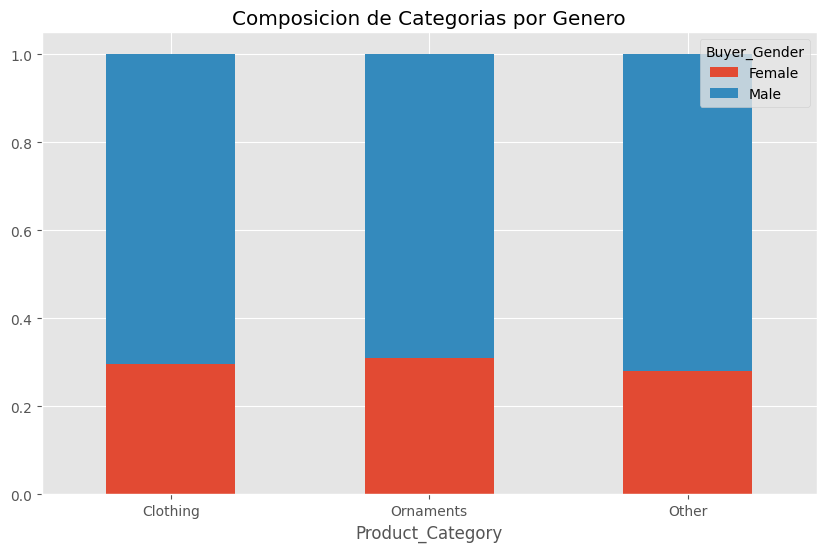

In [18]:
pd.crosstab(df['Product_Category'], df['Buyer_Gender'], normalize='index').plot(
    kind='bar', stacked=True, figsize=(10, 6))
plt.title("Composicion de Categorias por Genero")
plt.xticks(rotation=0)
plt.show()

Observamos que el genero masculino realiza mas ordenes en las 3 categorias.

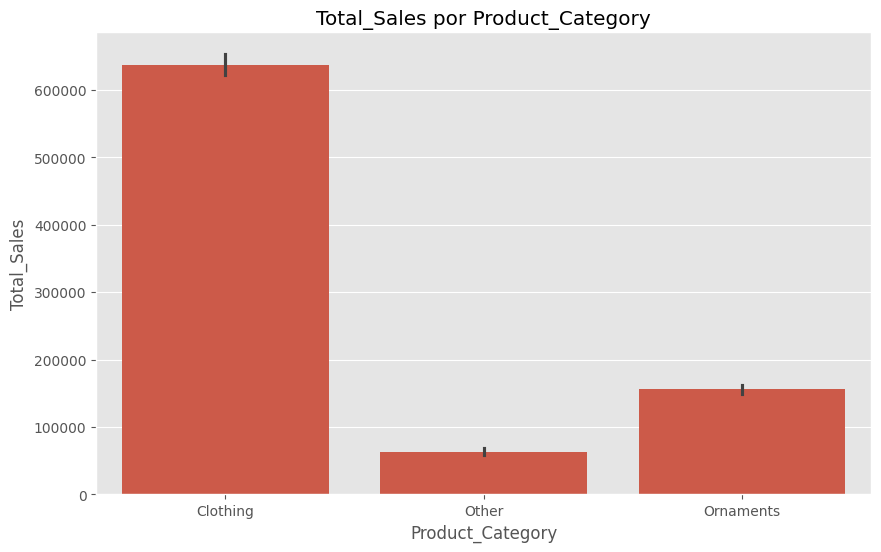

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Category', y='Total_Sales', data=df, estimator=sum)
plt.title('Total_Sales por Product_Category')
plt.show()

Como habiamos visto el anteriormente el producto que mas genera ventas es 'CLOTHING', ahora lo confirmamos graficamente.

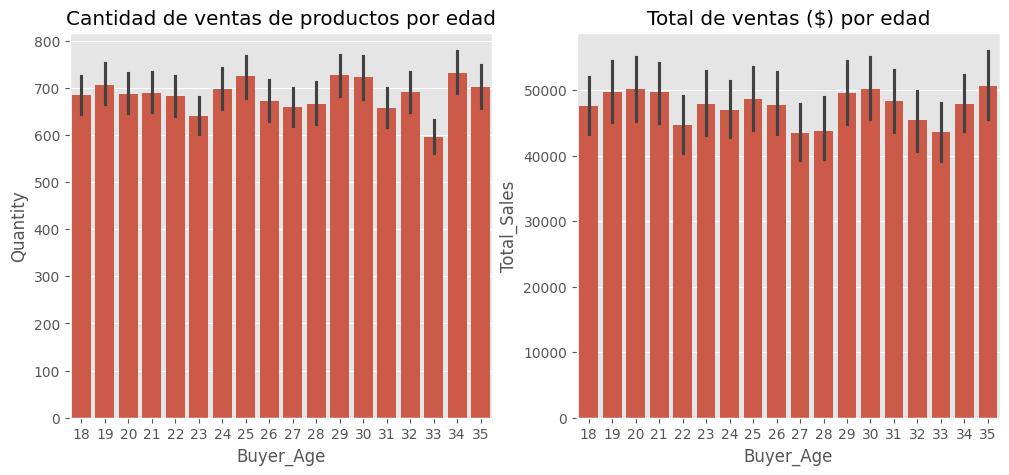

<Figure size 640x480 with 0 Axes>

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(ax=axes[0],x='Buyer_Age', y='Quantity', data=df, estimator=sum)
axes[0].set_title('Cantidad de ventas de productos por edad')
sns.barplot(ax=axes[1],x='Buyer_Age', y='Total_Sales', data=df, estimator=sum)
axes[1].set_title('Total de ventas ($) por edad')
plt.show()
plt.tight_layout();

No vemos mucha diferencia en la venta de productos en base a la edad teniendo en cuenta las cantidades de productos, ni tampoco en dinero gastado.

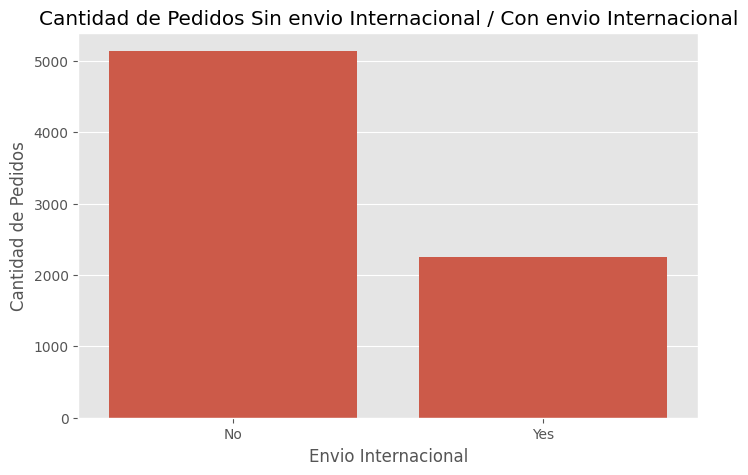

In [21]:
envios = df['International_Shipping'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=envios.index, y=envios.values)
plt.title('Cantidad de Pedidos Sin envio Internacional / Con envio Internacional')
plt.xlabel('Envio Internacional')
plt.ylabel('Cantidad de Pedidos')
plt.show()

Observamos que mas de 5000 pedidos no necesitaron envios internacionales, por lo que las mayorias de compras son locales.

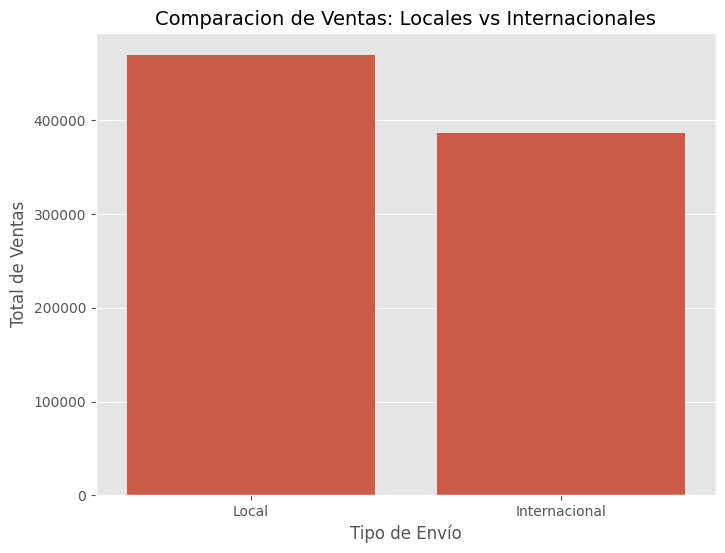

In [22]:
agrup = df.groupby('International_Shipping')['Total_Sales'].sum().reset_index()
agrup['International_Shipping'] = agrup['International_Shipping'].map({'Yes': 'Internacional', 'No': 'Local'})
plt.figure(figsize=(8, 6))
sns.barplot(
    data=agrup, 
    x='International_Shipping', 
    y='Total_Sales',)
plt.title('Comparacion de Ventas: Locales vs Internacionales', fontsize=14)
plt.xlabel('Tipo de Envío', fontsize=12)
plt.ylabel('Total de Ventas', fontsize=12)
plt.show();


Teniendo en cuenta el dinero gastado en ordenes con envios internacionales / nacionales, vemos que hay menos diferencia que en la cantidad de ordenes.

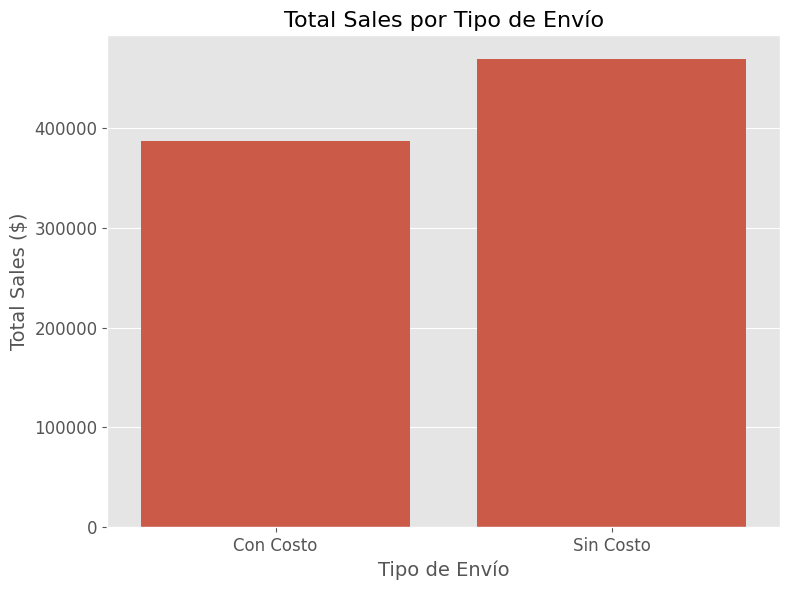

In [23]:
df['Shipping_Type'] = df['Shipping_Charges'].apply(lambda x: 'Con Costo' if x > 0 else 'Sin Costo')

# Grafico de barras para visualizar la cantidad de pedidos por tipo de envío
sales_by_shipping = df.groupby('Shipping_Type')['Total_Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Shipping_Type', y='Total_Sales', data=sales_by_shipping)
plt.title('Total Sales por Tipo de Envío', fontsize=16)
plt.xlabel('Tipo de Envío', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Como era de esperar, hay mas ventas en ordenes sin costo que con costo. Pero no por mucha diferencia.

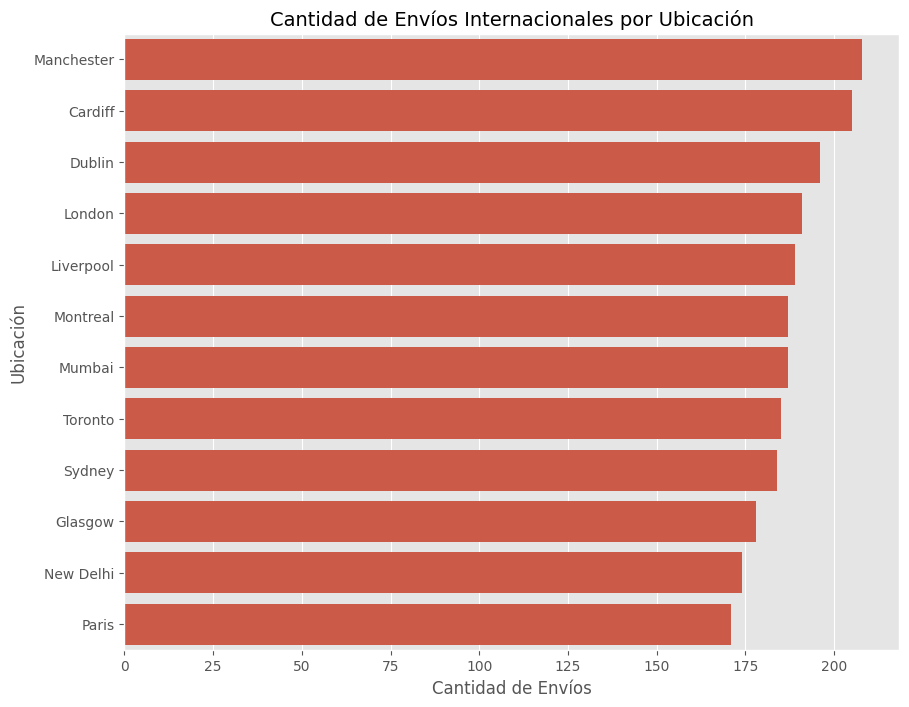

In [24]:
inte = df[df['International_Shipping'] == 'Yes']
location_data = inte.groupby('Order_Location').size().reset_index(name='Counts')
location_data = location_data.sort_values(by='Counts', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(
    data=location_data, 
    y='Order_Location', 
    x='Counts')
plt.title('Cantidad de Envíos Internacionales por Ubicación', fontsize=14)
plt.xlabel('Cantidad de Envíos', fontsize=12)
plt.ylabel('Ubicación', fontsize=12)
plt.show();


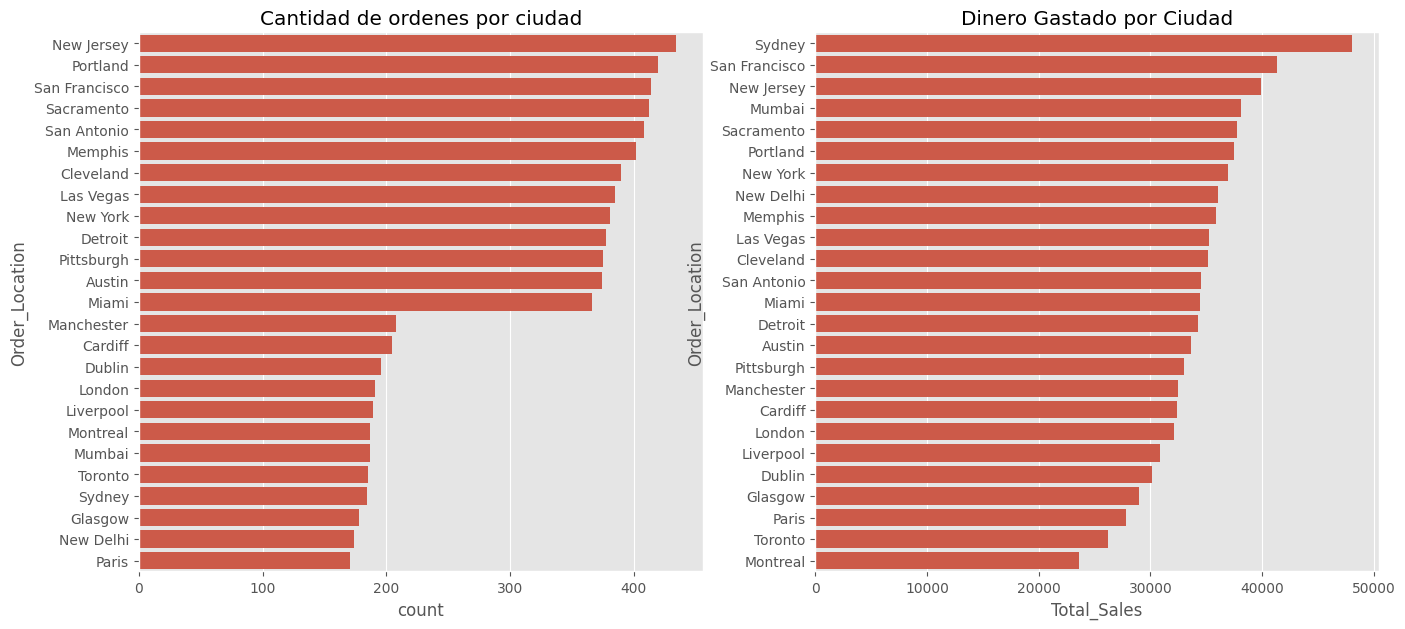

<Figure size 640x480 with 0 Axes>

In [25]:
c = df.groupby('Order_Location')['Total_Sales'].sum().reset_index()
c = c.sort_values(by='Total_Sales', ascending=False)
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
sns.countplot(ax=axes[0],y='Order_Location', data=df, order=df['Order_Location'].value_counts().index)
axes[0].set_title('Cantidad de ordenes por ciudad')
sns.barplot(ax=axes[1],y='Order_Location',x='Total_Sales',data=c)
axes[1].set_title('Dinero Gastado por Ciudad')
plt.show()
plt.tight_layout();

En los dos graficos mostrados anteriormente observamos que en la cantidad de ordenes por ciudad, la mayor es New Jersey y la menor Paris. Curiosamente el orden cambia cuando miramos el dinero generado por ciudad, en este caso la ciudad que mas dinero genero fue Sydney y la que menos Montreal.

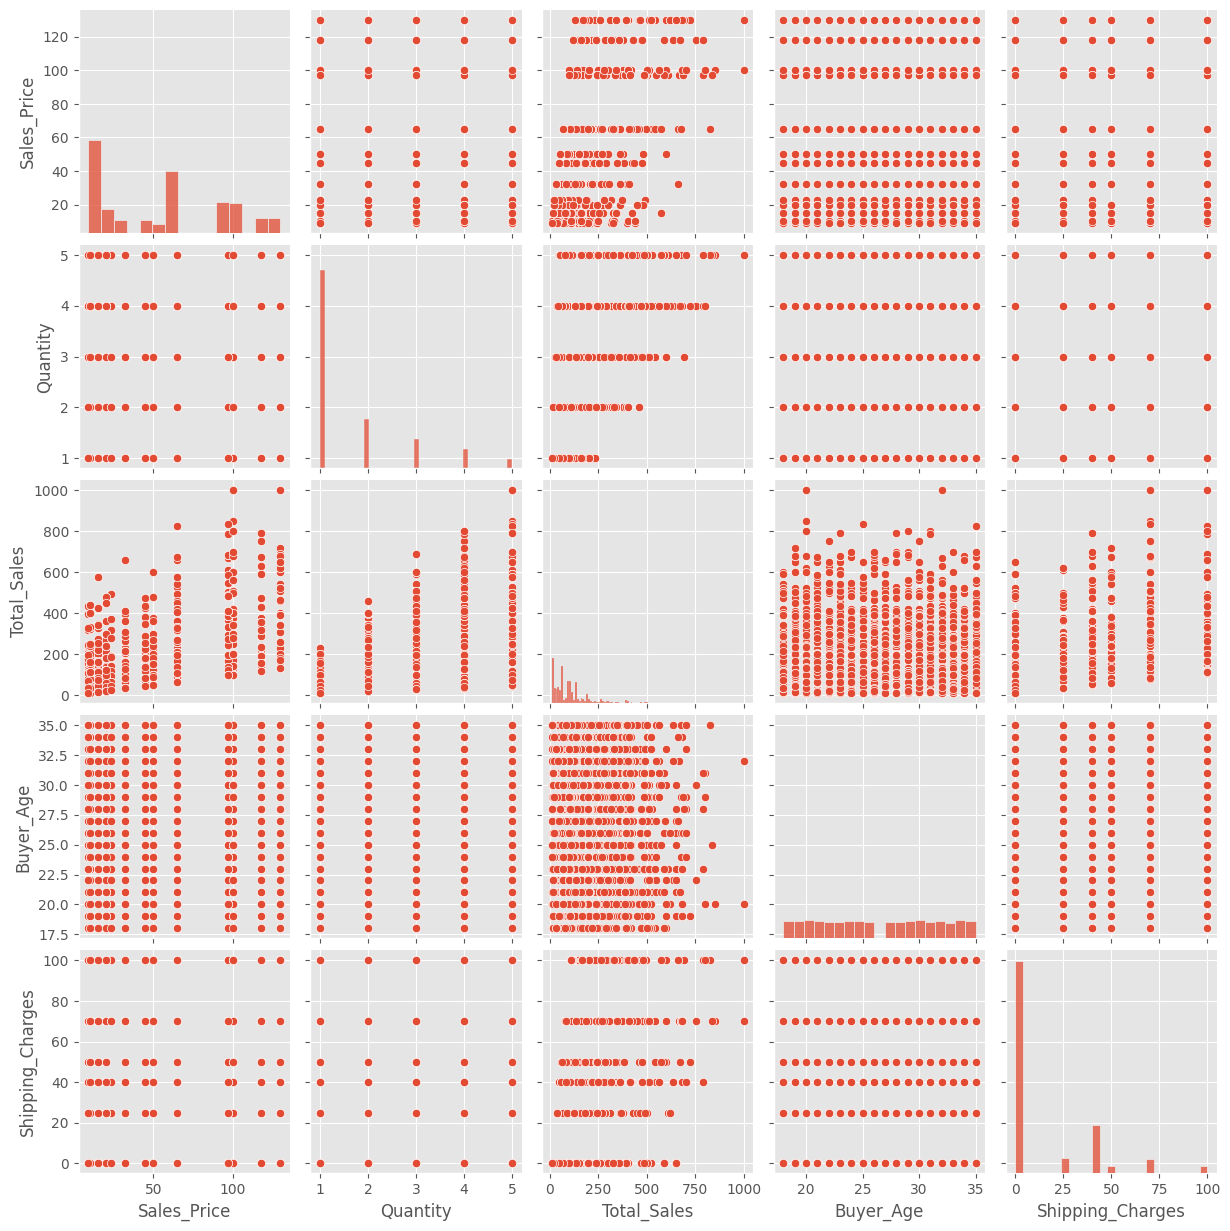

In [26]:
sns.pairplot(df[['Sales_Price', 'Quantity', 'Total_Sales', 'Buyer_Age','Shipping_Charges']])
plt.show()

PairPlot de algunas de las variables numericas.

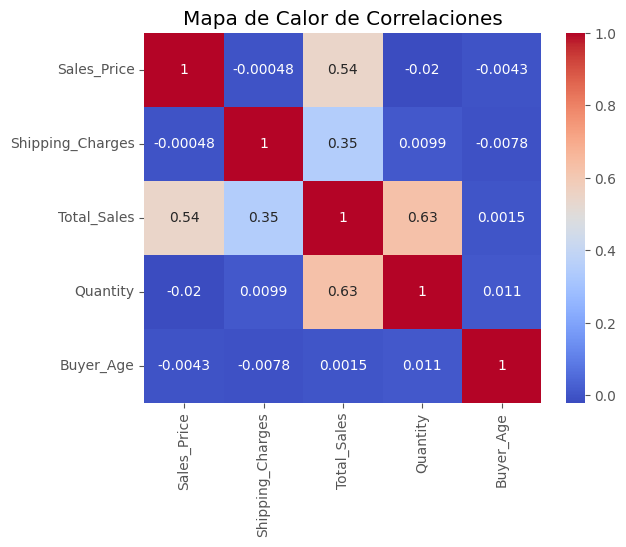

In [27]:
co = df[['Sales_Price', 'Shipping_Charges', 'Total_Sales', 'Quantity','Buyer_Age']].corr()
sns.heatmap(co, annot=True, cmap='coolwarm')
plt.title("Mapa de Calor de Correlaciones")
plt.show()


En el mapa de correlacion podemos ver cosas interensantes, como que Total_Sales tiene una alta relacion con Quantity. Y como hemos visto anteriormente no hay ninguna relacion entre las ventas totales, cantidad etc. con la edad del comprador.

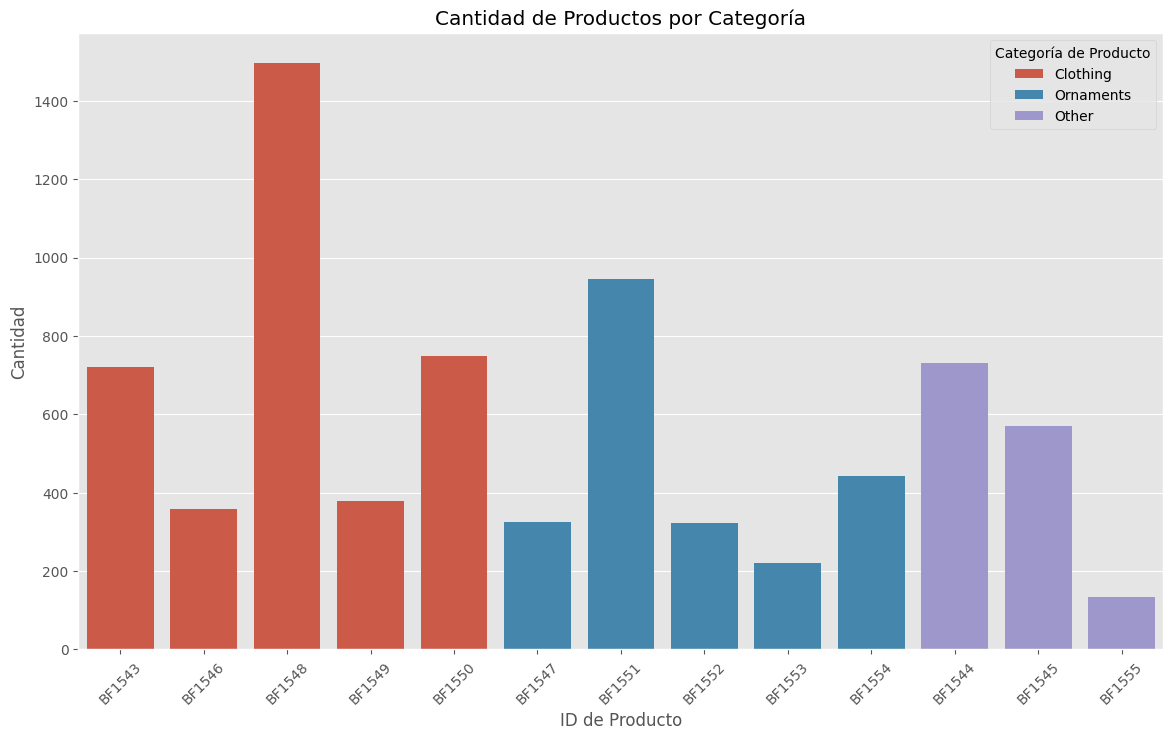

In [28]:
grouped_data = df.groupby(['Product_Category', 'Product_ID']).size().reset_index(name='Counts')
plt.figure(figsize=(14, 8))
sns.barplot(
    data=grouped_data, 
    x='Product_ID', 
    y='Counts', 
    hue='Product_Category', 
    dodge=False
)
plt.title('Cantidad de Productos por Categoría')
plt.xlabel('ID de Producto')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Categoría de Producto')
plt.show()

Podemos obsrvar que el producto 'BF1549' ha sido el mas vendido y 'BF1553' el que menos.

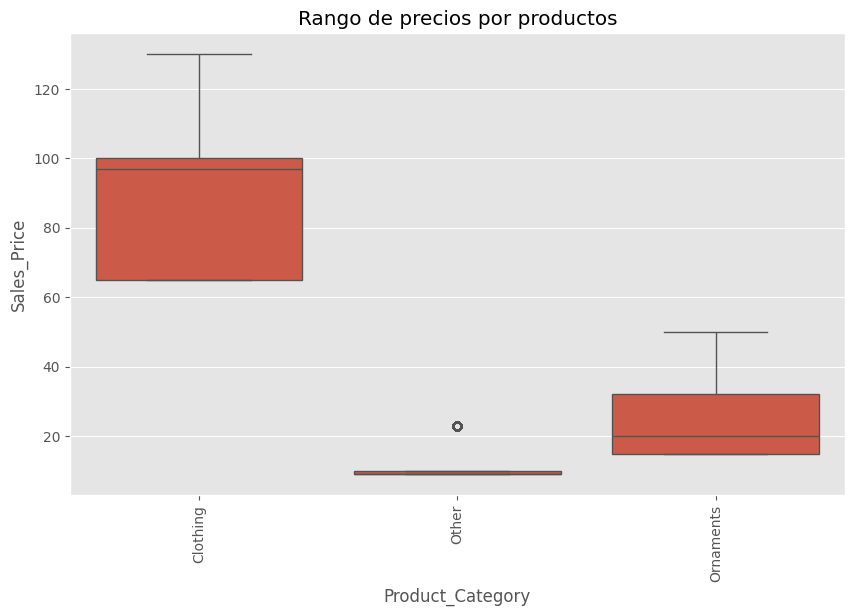

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(df,x='Product_Category', y='Sales_Price')
plt.xticks(rotation=90)
plt.title('Rango de precios por productos')
plt.show()

In [30]:
df.columns

Index(['Order_ID', 'Order_Date', 'Product_ID', 'Product_Category',
       'Buyer_Gender', 'Buyer_Age', 'Order_Location', 'International_Shipping',
       'Sales_Price', 'Shipping_Charges', 'Sales_per_Unit', 'Quantity',
       'Total_Sales', 'Rating', 'Shipping_Type'],
      dtype='object')

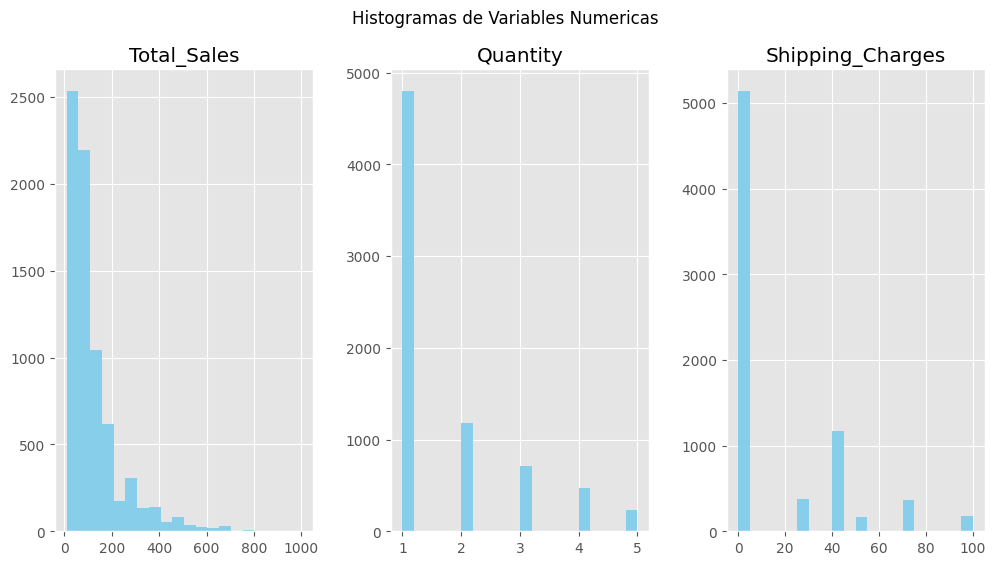

In [31]:
df[['Total_Sales', 'Quantity','Shipping_Charges','International_Shipping']].hist(bins=20, figsize=(12, 6), layout=(1, 3), color='skyblue')
plt.suptitle('Histogramas de Variables Numericas')
plt.show()


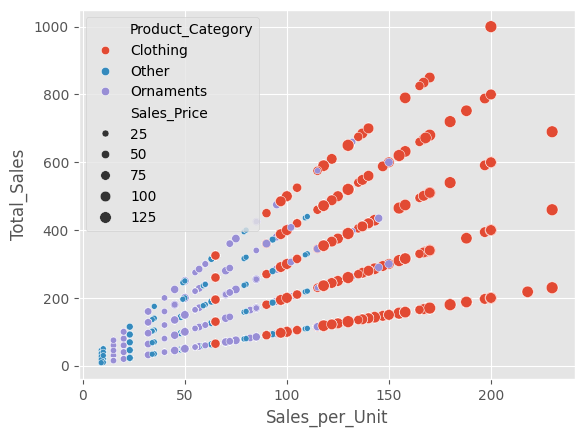

In [32]:
sns.scatterplot(data=df, x='Sales_per_Unit', y='Total_Sales', hue='Product_Category',size='Sales_Price')
plt.show()

Los productos de la categoria 'CLOTHING' generan las ventas más significativas, tanto en Sales_per_Unit como en Total_Sales. El precio por unidad y la cantidad parecen ser factores clave que afectan las ventas totales. Los productos mas caros tienen un impacto visible en las ventas totales independientemente de la categoría.

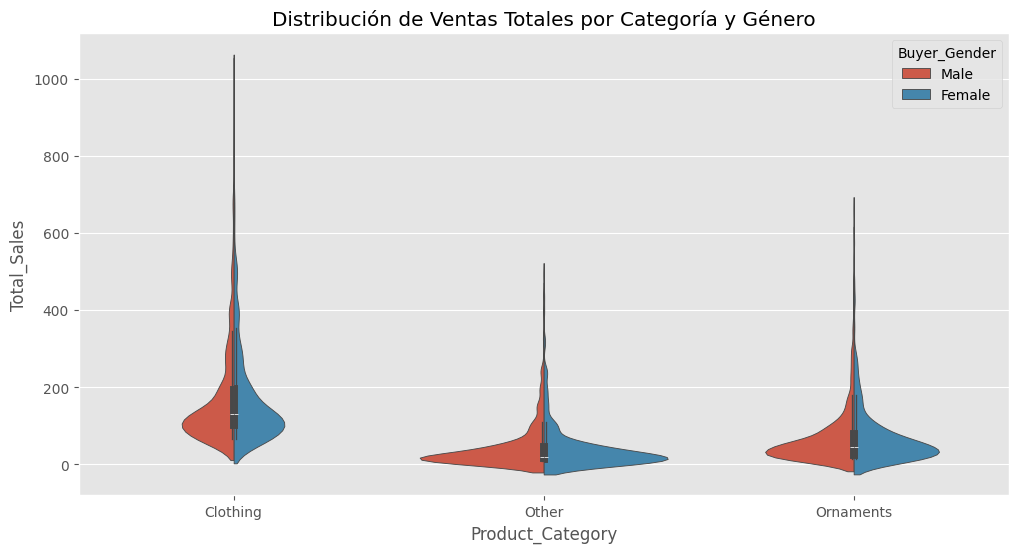

In [33]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Product_Category', y='Total_Sales', data=df, hue='Buyer_Gender', split=True)
plt.title('Distribución de Ventas Totales por Categoría y Género')
plt.show()


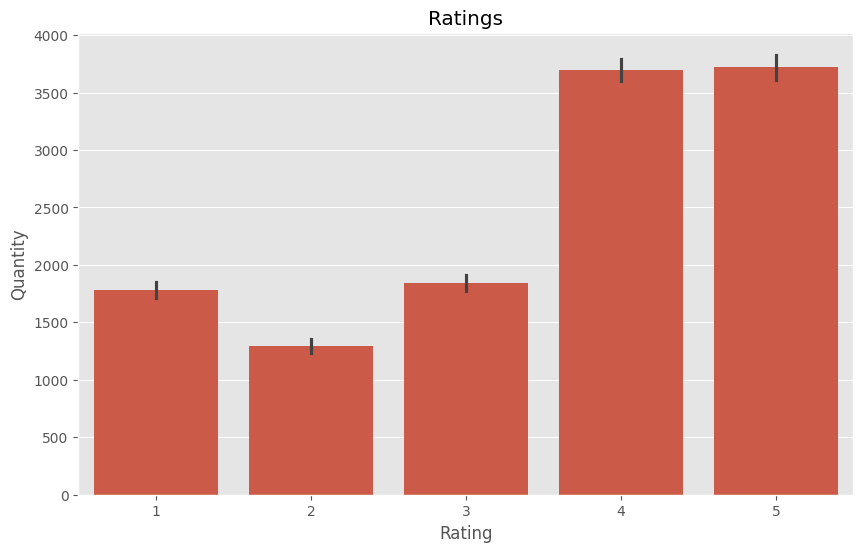

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Quantity', data=df, estimator=sum)
plt.title('Ratings')
plt.show()

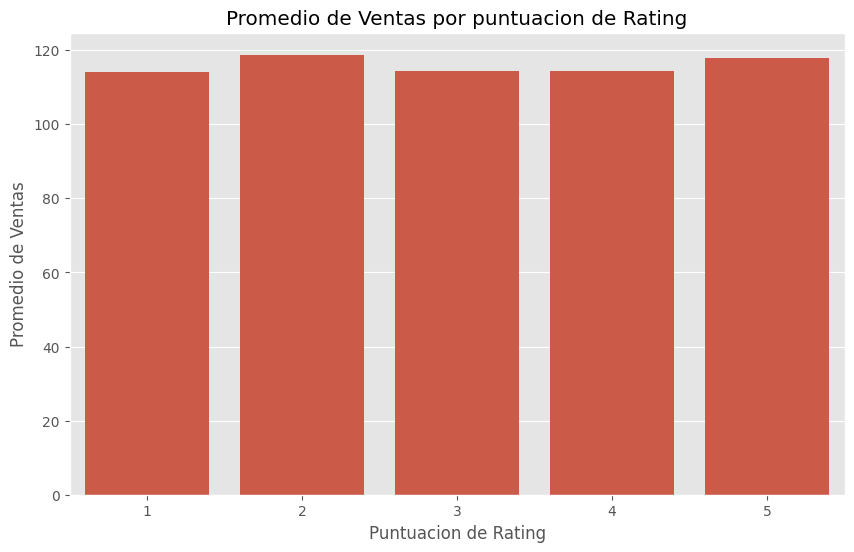

In [35]:
media_tot = df.groupby('Rating')['Total_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=media_tot, x='Rating', y='Total_Sales')
plt.title('Promedio de Ventas por puntuacion de Rating')
plt.xlabel('Puntuacion de Rating')
plt.ylabel('Promedio de Ventas')
plt.show();


Practicamente no hay diferencias en las medias de ventas por puntuacion.

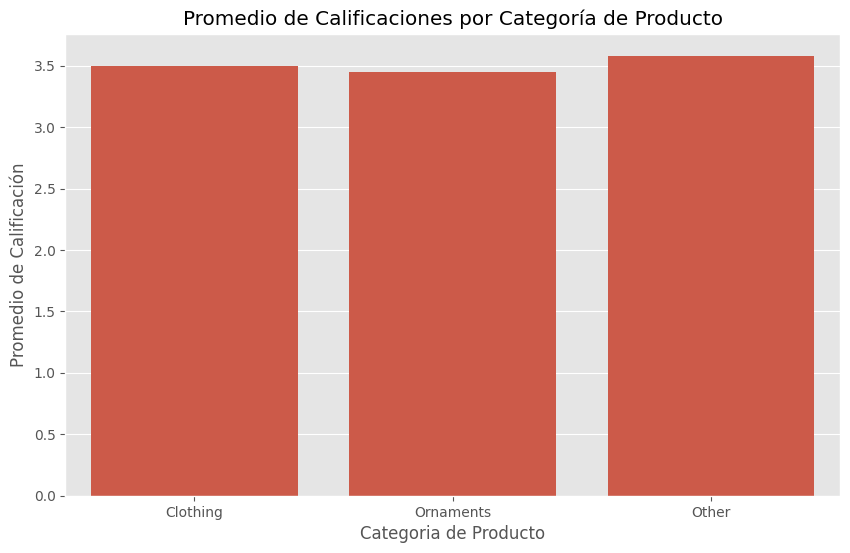

In [36]:
graf = df.groupby('Product_Category')['Rating'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=graf, x='Product_Category', y='Rating')
plt.title('Promedio de Calificaciones por Categoría de Producto')
plt.xlabel('Categoria de Producto')
plt.ylabel('Promedio de Calificación')
plt.show();

Vemos una ligera diferencia en la media de Rating por categoria en la variable "Other"